# Simulation théorème fondamentaux

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st

## Illustration de la loi des grands nombres

In [3]:
n = 10000
m = 10000

mean = np.pi/2
sigma = 0.1


# On fixe la graine (seed) de manière à pouvoir reproduire les résultats
np.random.seed(seed=959)

# Génération d'une matrice (m,n) d'observations indépendantes issues de la loi normale N(mean,sigma^2)
# Cette matrice peut être vue comme m échantillons de n observations indépendantes
X = st.norm.rvs(loc = mean, scale = sigma, size = (m,n))

# Pour chaque échantillon, (càd chaque ligne de la matrice) on calcule la moyenne cumulative et la moyenne
cumulative_mean = X.cumsum(axis = 1)/np.arange(1,n+1)
final_mean = X.mean(axis = 1)

epsilon = np.linspace(0,1,m+1)[1:]

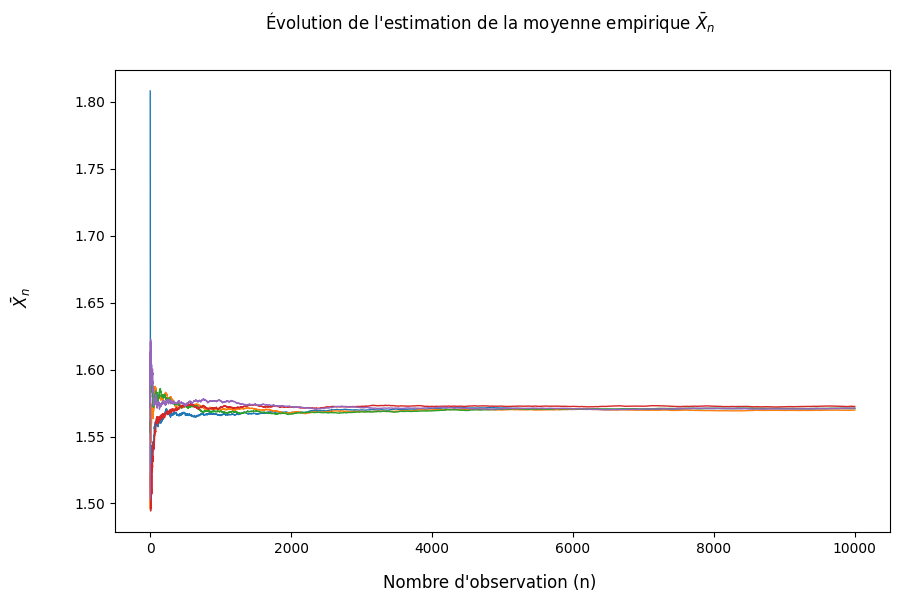

In [4]:
fig = plt.figure(figsize = (10,6))
fig.suptitle(r"Évolution de l'estimation de la moyenne empirique $\bar{X}_n$")
fig.supxlabel("Nombre d'observation (n)")
fig.supylabel(r"$\bar{X}_n$")
for i in range(0,5):
    # Pour plusieurs échantillons on fait le graphe de l'évolution de la moyenne empirique losque la taille de l'échantillon augmente
    plt.plot(np.arange(1,m+1),cumulative_mean[i,:],linewidth = 1)
plt.show()

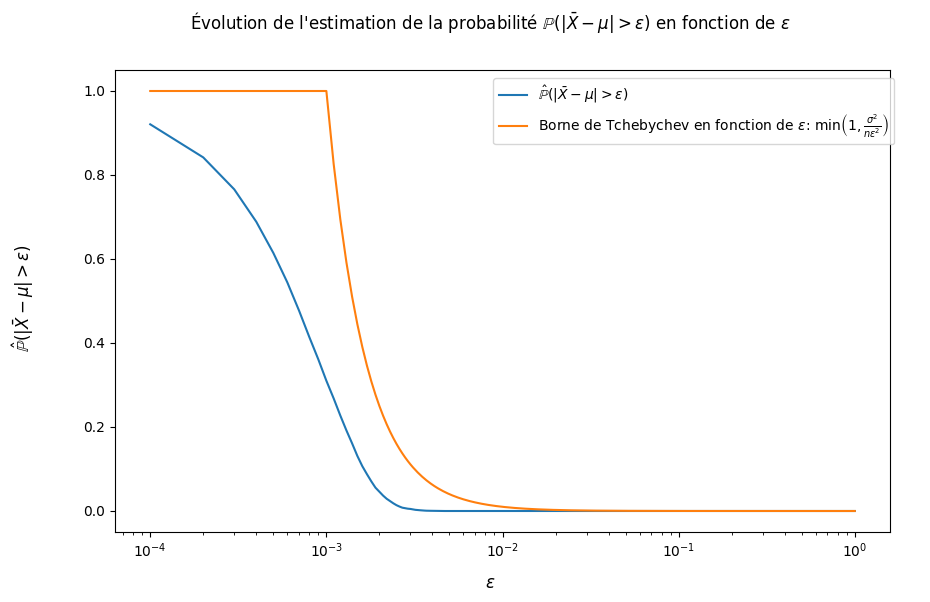

In [5]:
fig = plt.figure(figsize = (10,6))
fig.suptitle(r"Évolution de l'estimation de la probabilité $\mathbb{P}(| \bar{X} - \mu | > \epsilon)$ en fonction de $\epsilon$")
fig.supxlabel("$\epsilon$")
fig.supylabel(r"$\hat{\mathbb{P}}(| \bar{X} - \mu | > \epsilon)$")

# Estimation de la probabilité (= calcul proportion) que la différence avec l'espérance soit supérieure à un seuil epsilon
prob = (abs(final_mean-mean)>epsilon.reshape(epsilon.shape[0],1)).mean(axis=1)

plt.semilogx(epsilon,prob,label = r"$\hat{\mathbb{P}}(| \bar{X} - \mu | > \epsilon)$")

# Borne donnée par l'inégalité de Tchebychev
plt.semilogx(epsilon,np.array([min(1,sigma**2/(n*eps**2)) for eps in epsilon]),
             label = r"Borne de Tchebychev en fonction de $\epsilon$: $\min\left(1,\frac{\sigma^2}{n\epsilon^2}\right)$")

fig.legend(loc=[0.53,0.76])
plt.show()

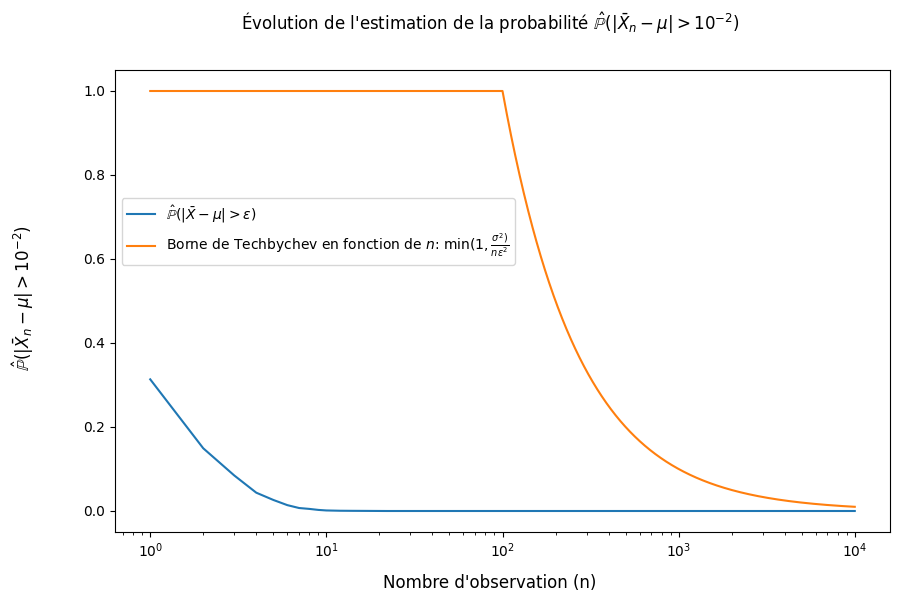

In [6]:
fig = plt.figure(figsize = (10,6))
fig.suptitle(r"Évolution de l'estimation de la probabilité $\hat{\mathbb{P}}(| \bar{X}_n - \mu | > 10^{-2})$")
fig.supxlabel("Nombre d'observation (n)")
fig.supylabel(r"$\hat{\mathbb{P}}(| \bar{X}_n - \mu | > 10^{-2})$")

# Estimation de la probabilité (= calcul proportion) que la déviation de l'espérance soit supérieur à un seuil fixe 
# pour une taille d'échantillon variable

prob = (abs(cumulative_mean-mean)>10e-2).mean(axis=0)

plt.semilogx(np.arange(1,n+1),prob,label = r"$\hat{\mathbb{P}}(| \bar{X} - \mu | > \epsilon)$")

# Borne donnée par l'inégalité de Tchebychev
plt.semilogx(np.arange(1,n+1),np.array([min(1,sigma**2/(n_*10**(-4))) for n_ in np.arange(1,n+1)]),
             label = r"Borne de Techbychev en fonction de $n$: $\min(1,\frac{\sigma^2)}{n\epsilon^2}$")

fig.legend(loc=[0.135,0.56])
plt.show()

## Contre-exemple loi des grands nombres

In [7]:
n = 100000
m = 50

np.random.seed(seed=959)

# Generation de m échantillons de n observations indépendantes de varables de Cauchy
X = st.cauchy.rvs(size = (m,n))

# Calcul de la moyenne cumulative pour chaque échantillon
cumulative_mean = X.cumsum(axis = 1)/np.arange(1,n+1)

Sur le graphique suivant, on peut voir l'évolution de la moyenne empirique d'échantillons d'observations de la loi de Cauchy pour des tailles d'échantilons grandissants. On remarque que la moyenne empirique ne semble pas converger vers une valeur fixe. Ceci est dû au fait que l'espérance de la loi de Cauchy est infinie et par conséquent, la loi des grands nombres ne s'applique pas.

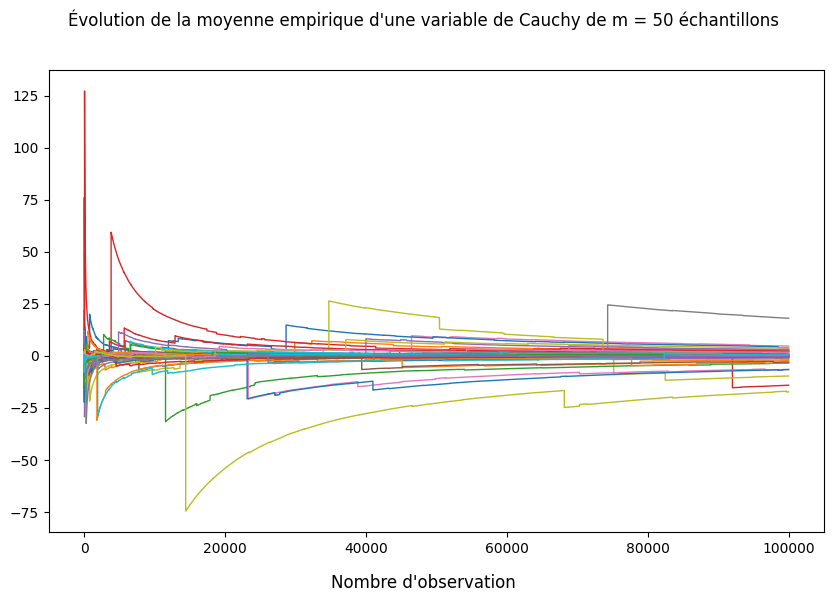

In [8]:
fig = plt.figure(figsize = (10,6))
fig.suptitle("Évolution de la moyenne empirique d'une variable de Cauchy de m = 50 échantillons")
fig.supxlabel("Nombre d'observation")
for i in range(0,50):
    # Plot de l'évolution de la moyenne empirique losque le nombre d'observations augmente
    plt.plot(np.arange(1,n+1),cumulative_mean[i,:],linewidth = 1)
plt.show()

## Illustration du théorème central limite avec la loi exponentielle

In [9]:
n = 10000
m = 10000

lambda_ = 0.5
np.random.seed(seed=959)

# Génération de variables exponentielles
X = st.expon.rvs(scale=1/lambda_,size=(m,n))

mean, var = st.expon.stats(scale = 1/lambda_,moments="mv")

# Standardisation des variables exponentielles
Z = (X-mean)/np.sqrt(var/n)

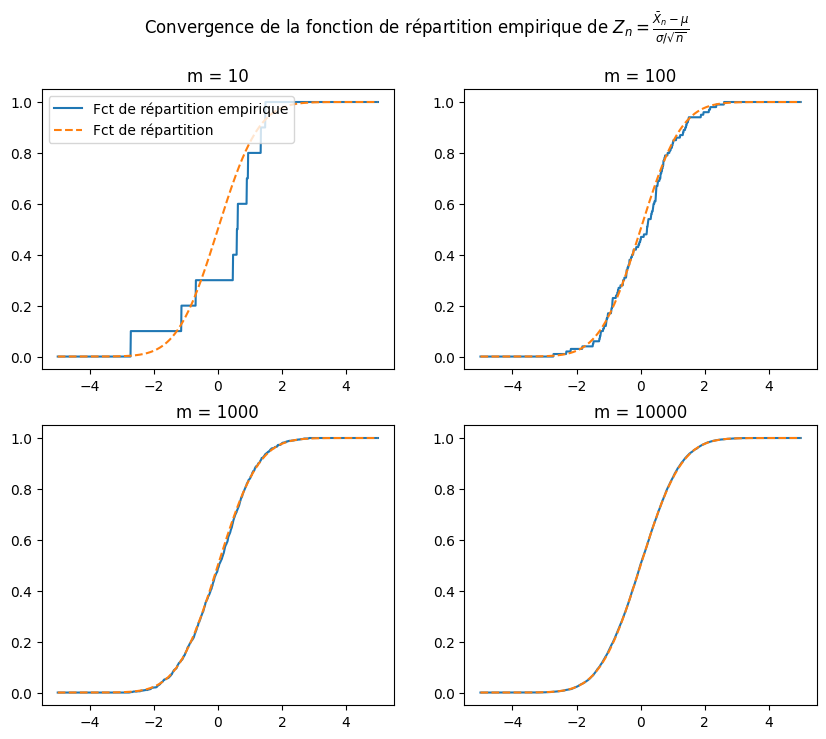

In [10]:
fig, axs = plt.subplots(2,2,figsize = (10,8))
fig.suptitle(r"Convergence de la fonction de répartition empirique de $Z_n = \frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}}$")

x = np.linspace(-5,5,1000).reshape(1000,1)

# On plot la fonction de répartition de la moyenne empirique (estimé sur n = 10000 observtaions) avec m = 10 échantillons
axs[0,0].plot(x,(Z[:10].mean(axis = 1)<x).mean(axis=1),label="Fct de répartition empirique")
axs[0,0].plot(x,st.norm.cdf(x),"--",label="Fct de répartition")
axs[0,0].set_title('m = 10')
axs[0,0].legend(loc='upper left')

# On plot la fonction de répartition de la moyenne empirique (estimé sur n = 10000 observtaions) avec m = 100 échantillons
axs[0,1].plot(x,(Z[:100].mean(axis = 1)<x).mean(axis=1))
axs[0,1].plot(x,st.norm.cdf(x),"--")
axs[0,1].set_title('m = 100')

# On plot la fonction de répartition de la moyenne empirique (estimé sur n = 10000 observtaions) avec m = 1000 échantillons
axs[1,0].plot(x,(Z[:1000].mean(axis = 1)<x).mean(axis=1))
axs[1,0].plot(x,st.norm.cdf(x),"--")
axs[1,0].set_title('m = 1000')

# On plot la fonction de répartition de la moyenne empirique (estimé sur n = 10000 observtaions) avec m = 10000 échantillons
axs[1,1].plot(x,(Z.mean(axis = 1)<x).mean(axis=1))
axs[1,1].plot(x,st.norm.cdf(x),"--")
axs[1,1].set_title('m = 10000')


plt.show()

## Illustration du théorème central limite avec la loi exponentielle

On peut montrer que lorsque $X_i \overset{iid}{\sim} Exp(\lambda)$ for $i = 1, \cdots, n$, on a que $\bar{X}_n \sim \Gamma(n,\frac{1}{n\lambda})$. On va se servir de ce résultat pour comparer la vrai distribution de $\bar{X}_n$ et celle de l'approximation donnée par le TCL, $\mathcal{N}(\mu,\frac{\sigma^2}{n})$, avec $\mu = \mathbb{E}[X_i] = \frac{1}{\lambda}$ et $\sigma^2 = \frac{1}{\lambda^2}$. On va donc comparer la distribution exacte de $\bar{X}_n$ à la distribution approximative donné par le TCL.

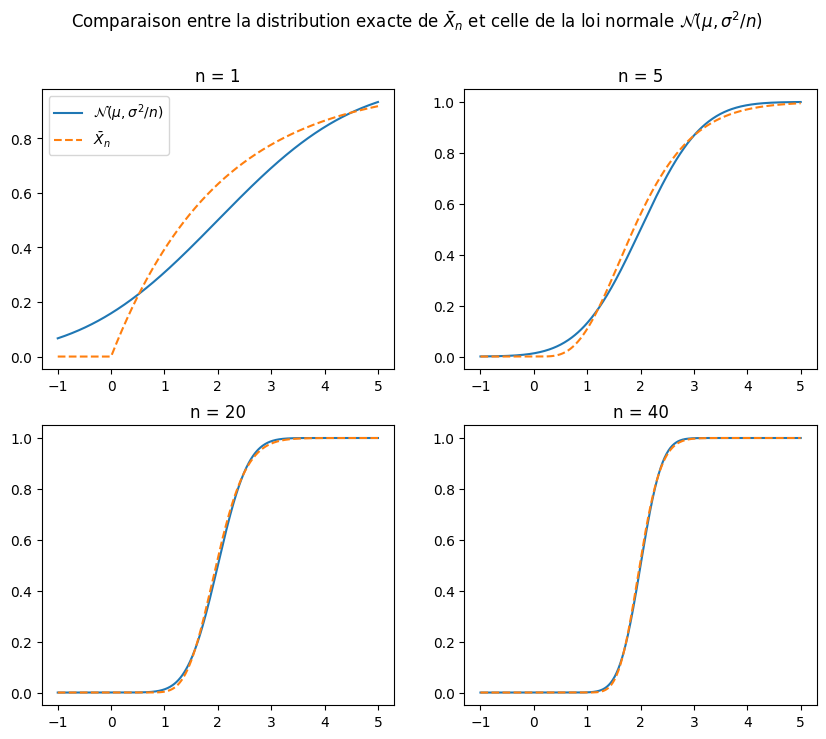

In [11]:
fig, axs = plt.subplots(2,2,figsize = (10,8))
fig.suptitle(r"Comparaison entre la distribution exacte de $\bar{X}_n$ et celle de la loi normale $\mathcal{N}(\mu,\sigma^2/n)$")

np.random.seed(seed=959)

x = np.linspace(-3+mean,3+mean,500)
n = [1,5,20,40]

axs[0,0].plot(x,st.norm.cdf(x,loc = mean, scale = np.sqrt(var/n[0])),label=r"$\mathcal{N}(\mu,\sigma^2/n)$")
axs[0,0].plot(x,st.gamma.cdf(x,n[0],scale=mean/n[0]),"--",label=r"$\bar{X}_n$")
axs[0,0].set_title(f'n = {n[0]}')

axs[0,1].plot(x,st.norm.cdf(x,loc = mean, scale = np.sqrt(var/n[1])))
axs[0,1].plot(x,st.gamma.cdf(x,n[1],scale=mean/n[1]),"--")
axs[0,1].set_title(f'n = {n[1]}')

axs[1,0].plot(x,st.norm.cdf(x,loc = mean, scale = np.sqrt(var/n[2])))
axs[1,0].plot(x,st.gamma.cdf(x,n[2],scale=mean/n[2]),"--")
axs[1,0].set_title(f'n = {n[2]}')

axs[1,1].plot(x,st.norm.cdf(x,loc = mean, scale = np.sqrt(var/n[3])))
axs[1,1].plot(x,st.gamma.cdf(x,n[3],scale=mean/n[3]),"--")
axs[1,1].set_title(f'n = {n[3]}')

axs[0,0].legend(loc='upper left')
plt.show()

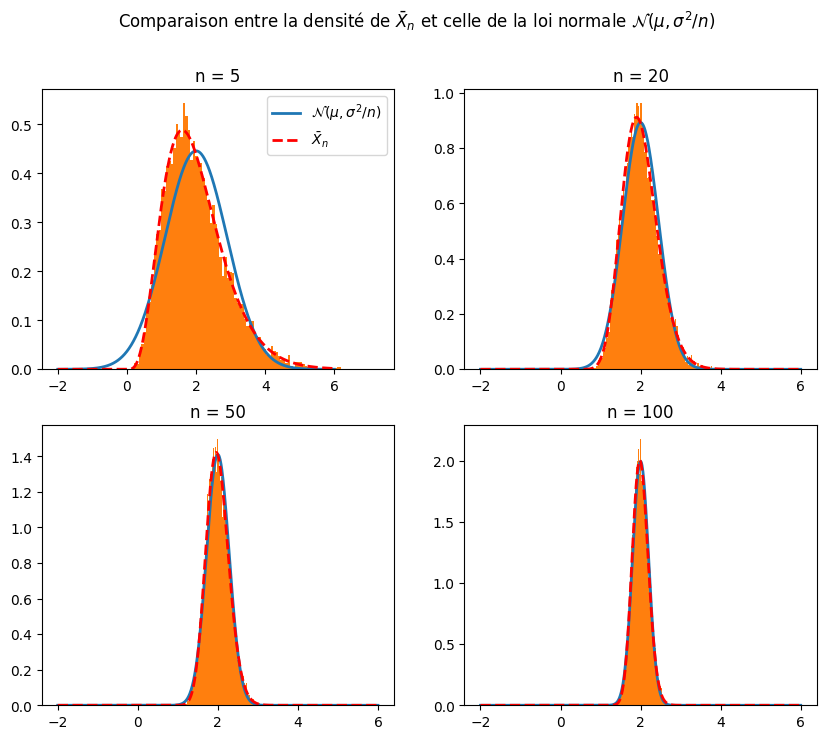

In [12]:
fig, axs = plt.subplots(2,2,figsize = (10,8))
fig.suptitle(r"Comparaison entre la densité de $\bar{X}_n$ et celle de la loi normale $\mathcal{N}(\mu,\sigma^2/n)$")

np.random.seed(seed=959)

x = np.linspace(-4+mean,4+mean,750)
n = [5,20,50,100]

axs[0,0].plot(x,st.norm.pdf(x,loc = mean, scale = np.sqrt(var/n[0])),label=r"$\mathcal{N}(\mu,\sigma^2/n)$",linewidth=2)
axs[0,0].plot(x,st.gamma.pdf(x,n[0],scale=mean/n[0]),"r--",label=r"$\bar{X}_n$",linewidth=2)
axs[0,0].hist(st.expon.rvs(scale=1/lambda_,size=(10000,n[0])).mean(axis=1),density=True,bins=100)
axs[0,0].set_title(f'n = {n[0]}')

axs[0,1].plot(x,st.norm.pdf(x,loc = mean, scale = np.sqrt(var/n[1])),linewidth=2)
axs[0,1].plot(x,st.gamma.pdf(x,n[1],scale=mean/n[1]),"r--",linewidth=2)
axs[0,1].hist(st.expon.rvs(scale=1/lambda_,size=(10000,n[1])).mean(axis=1),density=True,bins=100)
axs[0,1].set_title(f'n = {n[1]}')

axs[1,0].plot(x,st.norm.pdf(x,loc = mean, scale = np.sqrt(var/n[2])),linewidth=2)
axs[1,0].plot(x,st.gamma.pdf(x,n[2],scale=mean/n[2]),"r--",linewidth=2)
axs[1,0].hist(st.expon.rvs(scale=1/lambda_,size=(10000,n[2])).mean(axis=1),density=True,bins=100)
axs[1,0].set_title(f'n = {n[2]}')

axs[1,1].plot(x,st.norm.pdf(x,loc = mean, scale = np.sqrt(var/n[3])),linewidth=2)
axs[1,1].plot(x,st.gamma.pdf(x,n[3],scale=mean/n[3]),"r--",linewidth=2)
axs[1,1].hist(st.expon.rvs(scale=1/lambda_,size=(10000,n[3])).mean(axis=1),density=True,bins=100)
axs[1,1].set_title(f'n = {n[3]}')

axs[0,0].legend(loc='upper right')
plt.show()

## Illustration de la convergence du TCL par le théorème de Berry-Esseen

Soient $ X_i $ iid tels que $ \mathbb{E}(X) = \mu $, $ \text{Var}(X) = \sigma^2 $ et $ \mathbb{E}(|X-\mu|^3) = \kappa$ et soit 
\begin{gather*} Z_n = \sqrt{n} \frac{\overline{X} - \mu}{\sigma} = \frac{1}{\sigma \sqrt{n}} \sum_{i=1}^n (X_i-\mu).\end{gather*}
Alors, $\forall z$ l'erreur de l'approximation Gaussienne est bornée par:
\begin{gather*} | \mathbb{P}(Z_n \leq z) - \Phi(z) | \leq \frac{0.5 \kappa}{\sigma^3 \sqrt{n}}.\end{gather*}

Remarquons d'ailleurs que comme la borne est indépendante de $z$, nous avons même le résultat plus fort:  
\begin{gather*} \sup_{z}| \mathbb{P}(Z_n \leq z) - \Phi(z) | \leq \frac{0.5 \kappa}{\sigma^3 \sqrt{n}}.\end{gather*}

Regardons si cette convergence est satisfaite pour des variables $X_i \overset{iid}{\sim} Exp(\lambda)$.

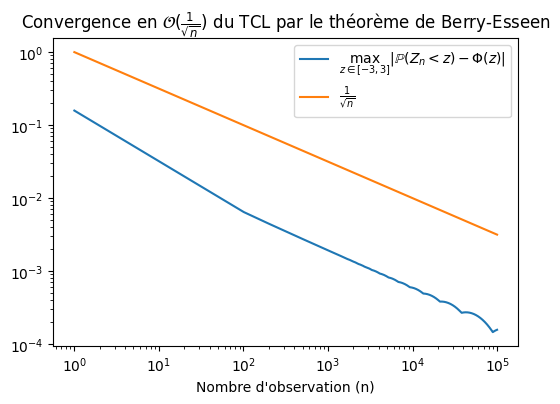

In [13]:
fig, axs = plt.subplots(1,1,figsize = (6,4))

np.random.seed(seed=959)

x = np.linspace(-3,3,1000)
m = 100000
n = np.arange(1,m,m/1000)

err = np.zeros(len(n))

for i in range(len(n)):
    norm = st.norm.cdf(x,loc = mean, scale = np.sqrt(var/n[i]))
    x_bar = st.gamma.cdf(x,n[i], scale=mean/n[i])
    err[i] = (norm-x_bar).max()

# Plot de la déviation maximale entre la fonction de répartition exacte et celle approximative
axs.loglog(n,err,label=r"$\max_{z\in[-3,3]} |\mathbb{P}(Z_n < z) - \Phi(z)|$")

# Plot de la borne donnée dans thm de Berry-Esseen à une constante multiplicative près
axs.loglog(n,1./np.sqrt(n),label = r"$\frac{1}{\sqrt{n}}$")

axs.set_title(r"Convergence en $\mathcal{O}(\frac{1}{\sqrt{n}})$ du TCL par le théorème de Berry-Esseen")
axs.set_xlabel("Nombre d'observation (n)")
axs.legend(loc='upper right')
plt.show()

In [14]:
print(f"La valeur estimée de l'espérance de X est {X.mean(axis=1).mean(axis=0):.3f} qui est proche de la vraie valeur de l'espérance 0.")

La valeur estimée de l'espérance de X est 2.000 qui est proche de la vraie valeur de l'espérance 0.
